1. Загрузить датасет в Python.
2. Описать набор данных и решаемую задачу.
3. Выделить целевую переменную и факторные переменные.
4. Удалить ненужные данные, проанализировать отсутствующие значения.
5. Прокомментировать количественные параметры датасета.
6. Разбить выборку на обучающую и тестовую.
7.  Выбор признаков.


Данный вариант предполагает фокусировку на улучшении модели путем ввода новых признаков в модель. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует исследовать влияние исключения существующих и введения новых признаков в модель на эффективность. Как вариант можно рассматривать введение полиномиальных признаков. Следует стремиться к максимальному увеличению эффективности модели.


In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

1. Загрузить датасет в Python.

In [249]:
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


2. Описать набор данных и решаемую задачу.

Этот набор данных охватывает метеорологические и пространственно-временные данные о лесных пожарах (между 2000 и 2003 гг.) в природном парке Монтесинью в Португалии с 13 атрибутами для 517 таких инцидентов. Нашим целевым атрибутом из этих 13 является «площадь» — общая выгоревшая площадь в гектарах (га). Соответствующие данные о погоде — это данные, которые регистрируются датчиками при обнаружении пожара (или его первом возникновении). У нас есть: температура, относительная влажность (относительная влажность), ветер (скорость), дождь (накопленные осадки за последние 30 минут)

Можно решить задачу регрессии, чтобы предсказать площадь, пораженную огнем

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [251]:
print('Количество строк: ', df.shape[0], '\nКоличество столбцов: ', df.shape[1])

Количество строк:  517 
Количество столбцов:  13


In [252]:
print('\nТипы переменных:\n', df.dtypes)


Типы переменных:
 X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [253]:
print('\nКоличество уникальных полей для каждого столбца:\n', df.nunique())


Количество уникальных полей для каждого столбца:
 X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64


In [254]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


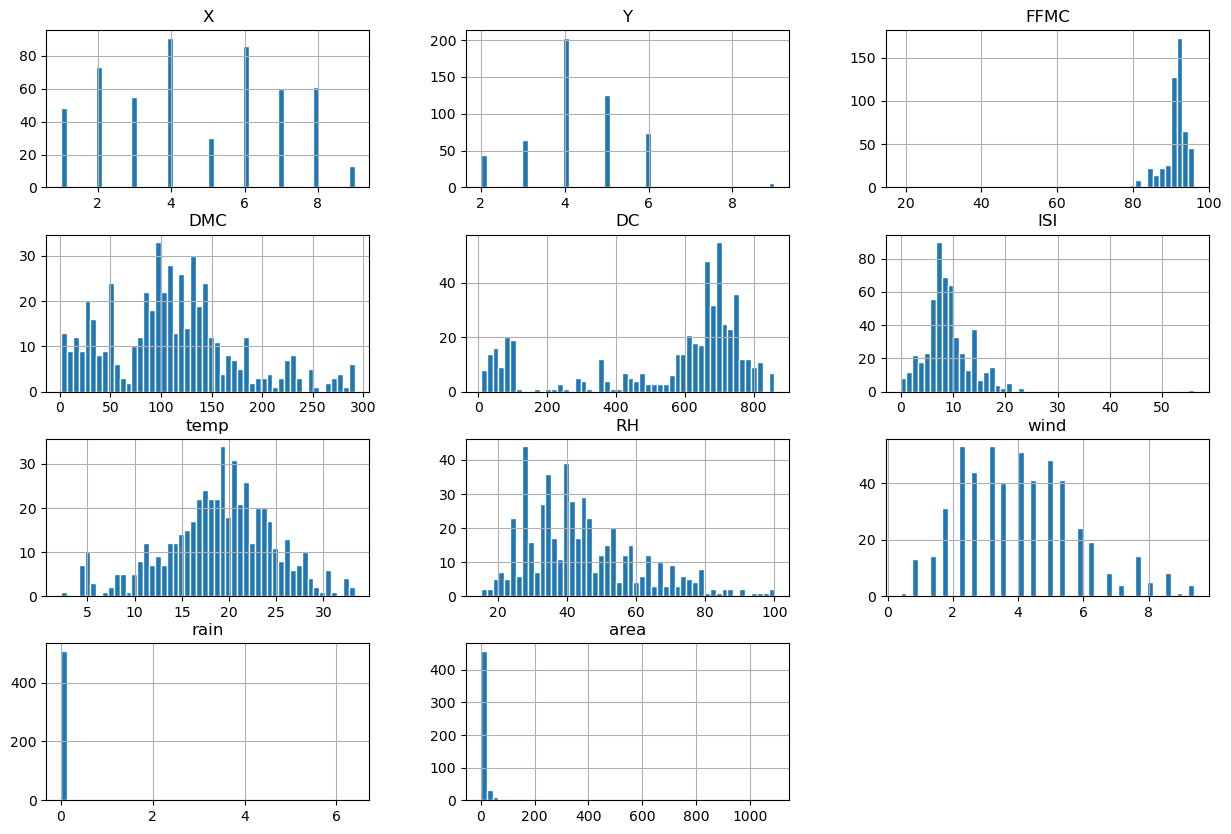

In [255]:
df.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

3. Выделить целевую переменную и факторные переменные.

In [185]:
Целевая переменная - area, факторные - 

SyntaxError: invalid syntax (2979653224.py, line 1)

4. Удалить ненужные данные, проанализировать отсутствующие значения.

In [ ]:
df.isnull().sum()

Нет осутствующих значений

In [ ]:
features = df.columns
features

In [256]:
df = df.drop(['X', 'Y', 'month', 'day'], axis=1)

In [187]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Выбросыыыыыыыыыыыы

In [188]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0], x[(x <= upper_bound) | (x >= lower_bound)].min(), x[(x <= upper_bound) | (x >= lower_bound)].max()

<AxesSubplot:>

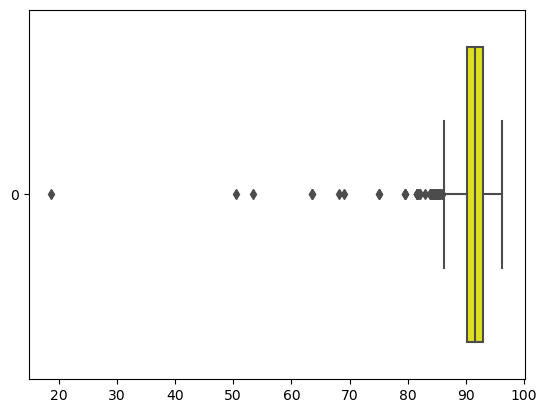

In [189]:
sns.boxplot(data=df.FFMC, color='yellow', orient='h')

In [190]:
FFMC_outliers, min_border, max_border = outliers_iqr(df['FFMC'])

In [191]:
len(FFMC_outliers)

53

In [192]:
df.loc[FFMC_outliers, 'FFMC'] = np.nan

<AxesSubplot:>

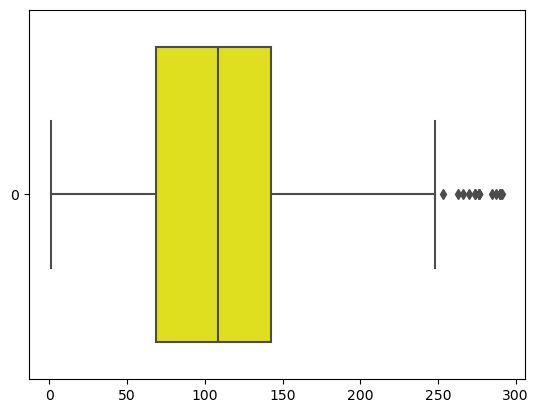

In [193]:
sns.boxplot(data=df.DMC, color='yellow', orient='h')

In [194]:
DMC_outliers, min_border, max_border = outliers_iqr(df['DMC'])

In [195]:
len(DMC_outliers)

17

In [196]:
df.loc[DMC_outliers, 'DMC'] = np.nan

<AxesSubplot:>

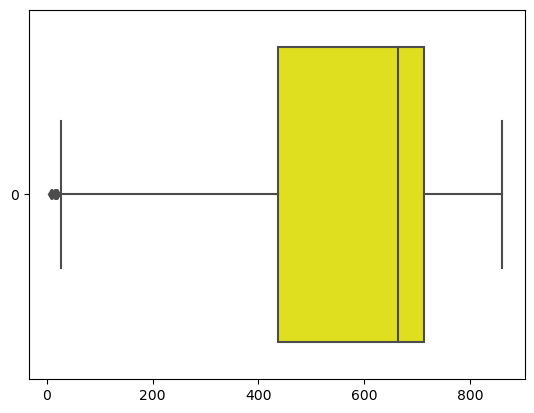

In [197]:
sns.boxplot(data=df.DC, color='yellow', orient='h')

In [198]:
DC_outliers, min_border, max_border = outliers_iqr(df['DC'])

In [199]:
len(DC_outliers)

8

In [200]:
df.loc[DC_outliers, 'DC'] = np.nan

<AxesSubplot:>

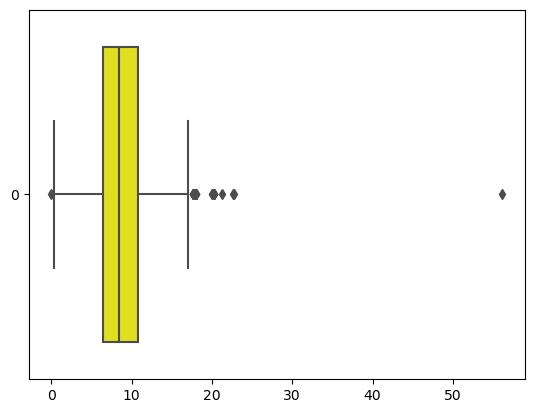

In [201]:
sns.boxplot(data=df.ISI, color='yellow', orient='h')

In [202]:
ISI_outliers, min_border, max_border = outliers_iqr(df['ISI'])

In [203]:
len(ISI_outliers)

23

In [204]:
df.loc[ISI_outliers, 'ISI'] = np.nan

<AxesSubplot:>

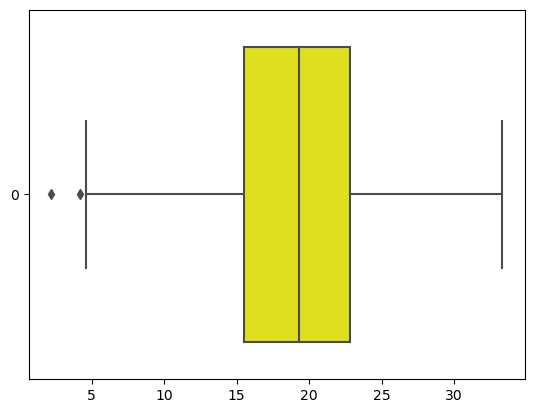

In [205]:
sns.boxplot(data=df.temp, color='yellow', orient='h')

In [206]:
temp_outliers, min_border, max_border = outliers_iqr(df['temp'])

In [207]:
len(temp_outliers)

2

In [208]:
df.loc[temp_outliers, 'temp'] = np.nan

<AxesSubplot:>

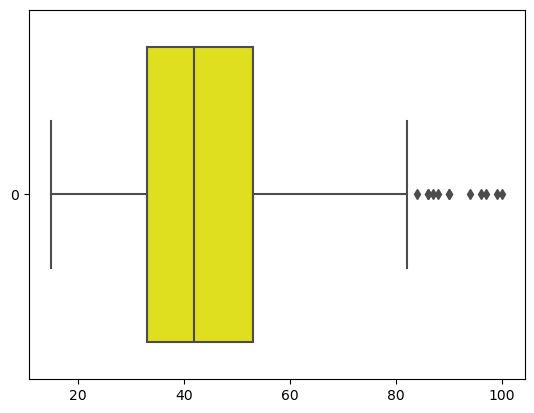

In [209]:
sns.boxplot(data=df.RH, color='yellow', orient='h')

In [210]:
RH_outliers, min_border, max_border = outliers_iqr(df['RH'])

In [211]:
len(RH_outliers)

12

In [212]:
df.loc[RH_outliers, 'RH'] = np.nan

<AxesSubplot:>

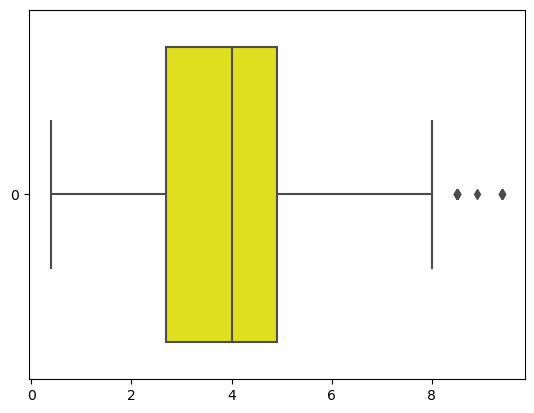

In [213]:
sns.boxplot(data=df.wind, color='yellow', orient='h')

In [214]:
wind_outliers, min_border, max_border = outliers_iqr(df['wind'])

In [215]:
len(wind_outliers)

13

In [216]:
df.loc[wind_outliers, 'wind'] = np.nan

<AxesSubplot:>

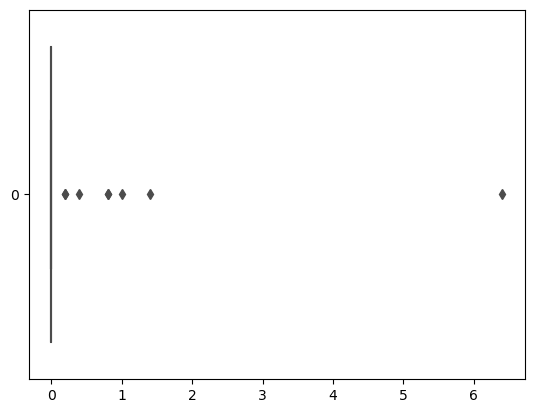

In [217]:
sns.boxplot(data=df.rain, color='yellow', orient='h')

In [218]:
rain_outliers, min_border, max_border = outliers_iqr(df['rain'])

In [219]:
len(rain_outliers)

8

In [220]:
df.loc[rain_outliers, 'rain'] = np.nan

<AxesSubplot:>

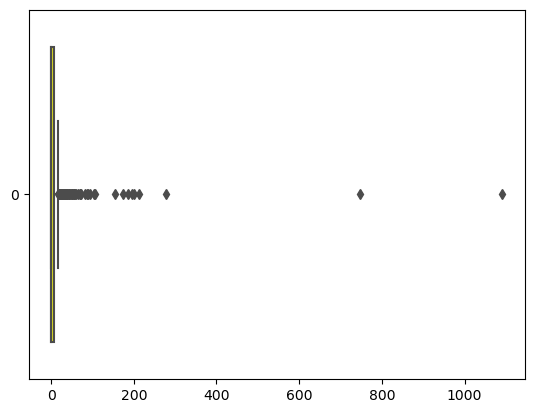

In [221]:
sns.boxplot(data=df.area, color='yellow', orient='h')

In [222]:
area_outliers, min_border, max_border = outliers_iqr(df['area'])

In [223]:
len(area_outliers)

63

In [224]:
df.loc[area_outliers, 'area'] = np.nan

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    464 non-null    float64
 1   DMC     500 non-null    float64
 2   DC      509 non-null    float64
 3   ISI     494 non-null    float64
 4   temp    515 non-null    float64
 5   RH      505 non-null    float64
 6   wind    504 non-null    float64
 7   rain    509 non-null    float64
 8   area    454 non-null    float64
dtypes: float64(9)
memory usage: 36.5 KB


In [226]:
df = df.dropna()

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 515
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    356 non-null    float64
 1   DMC     356 non-null    float64
 2   DC      356 non-null    float64
 3   ISI     356 non-null    float64
 4   temp    356 non-null    float64
 5   RH      356 non-null    float64
 6   wind    356 non-null    float64
 7   rain    356 non-null    float64
 8   area    356 non-null    float64
dtypes: float64(9)
memory usage: 27.8 KB


5. Прокомментировать количественные параметры датасета.

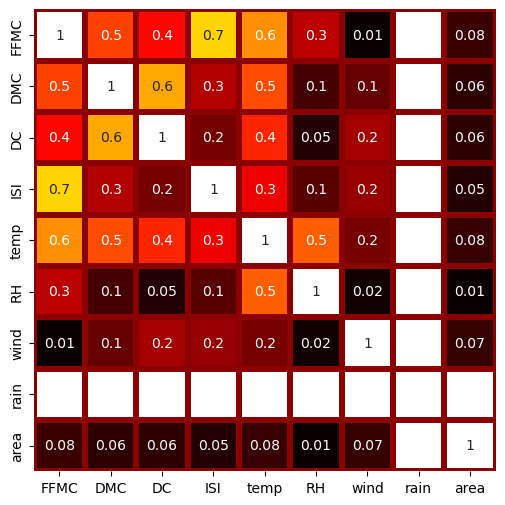

In [228]:
df_corr = df.corr().abs()
f=plt.figure(figsize=(6,6))
corr_matrix = sns.heatmap(
            df_corr, 
            annot = True, 
            fmt = '.1g', 
            cmap = 'hot', 
            linewidths = 4, 
            linecolor = 'darkred',
            cbar = False, 
            square = True, 
            xticklabels = df_corr.columns, 
            yticklabels = df_corr.columns);

In [229]:
corr_matrix = df.corr(method='spearman')
corr_matrix

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.425003,0.179943,0.684034,0.539166,-0.298685,0.021104,NaN,0.073826
DMC,0.425003,1.000000,0.412716,0.304963,0.476467,0.044197,-0.144309,NaN,0.105391
DC,0.179943,0.412716,1.000000,-0.021326,0.203486,0.059137,-0.230662,NaN,0.079991
ISI,0.684034,0.304963,-0.021326,1.000000,0.329688,-0.161206,0.217735,NaN,0.091079
temp,0.539166,0.476467,0.203486,0.329688,1.000000,-0.512100,-0.159421,NaN,0.114979
RH,-0.298685,0.044197,0.059137,-0.161206,-0.512100,1.000000,-0.013764,NaN,0.051093
wind,0.021104,-0.144309,-0.230662,0.217735,-0.159421,-0.013764,1.000000,NaN,-0.079969
rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,0.073826,0.105391,0.079991,0.091079,0.114979,0.051093,-0.079969,NaN,1.000000


6. Разбить выборку на обучающую и тестовую.

In [257]:
y = df['area']
x = df.drop('area', axis=1)

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [232]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((284, 8), (284,), (72, 8), (72,))

7.  Выбор признаков.


Данный вариант предполагает фокусировку на улучшении модели путем ввода новых признаков в модель. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует исследовать влияние исключения существующих и введения новых признаков в модель на эффективность. Как вариант можно рассматривать введение полиномиальных признаков. Следует стремиться к максимальному увеличению эффективности модели.


In [258]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [259]:
y_pred = model.predict(x)
print(y_pred[:5])

[  5.56414506   4.76384036   3.02523794 -10.22497529  -9.96737932]


In [260]:
print(y[:5])

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64


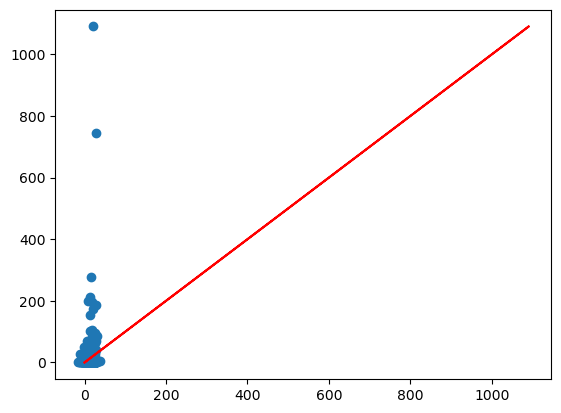

In [261]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [262]:
model.score(x, y)

0.01601284619400689

In [263]:
print(f'Intercept: {model.intercept_}')
print(f'R^2 score: {model.score(x_train, y_train)}')

Intercept: 2.493810840979597
R^2 score: -13.953841425267312


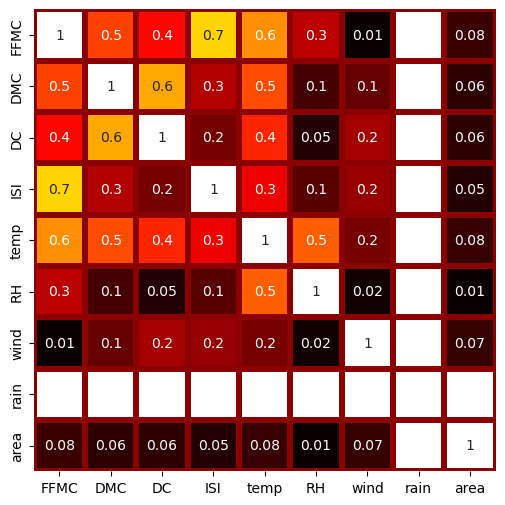

In [239]:
df_corr = df.corr().abs()
f=plt.figure(figsize=(6,6))
corr_matrix = sns.heatmap(
            df_corr, 
            annot = True, 
            fmt = '.1g', 
            cmap = 'hot', 
            linewidths = 4, 
            linecolor = 'darkred',
            cbar = False, 
            square = True, 
            xticklabels = df_corr.columns, 
            yticklabels = df_corr.columns);

In [240]:
x.drop(['rain', 'RH'], axis=1)

,FFMC,DMC,DC,ISI,temp,wind
0,86.2,26.2,94.3,5.1,8.2,6.7
1,90.6,35.4,669.1,6.7,18.0,0.9
2,90.6,43.7,686.9,6.7,14.6,1.3
5,92.3,85.3,488.0,14.7,22.2,5.4
6,92.3,88.9,495.6,8.5,24.1,3.1
...,...,...,...,...,...,...
505,91.0,163.2,744.4,10.1,26.7,1.8
507,91.0,166.9,752.6,7.1,25.9,3.6
508,91.0,166.9,752.6,7.1,25.9,3.6
510,91.0,166.9,752.6,7.1,18.2,5.4


In [241]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [242]:
y_pred = model.predict(x)
print(y_pred[:5])

[0.61960651 2.23825491 1.98696654 1.89389063 2.27809884]


In [243]:
print(y[:5])

0    0.0
1    0.0
2    0.0
5    0.0
6    0.0
Name: area, dtype: float64


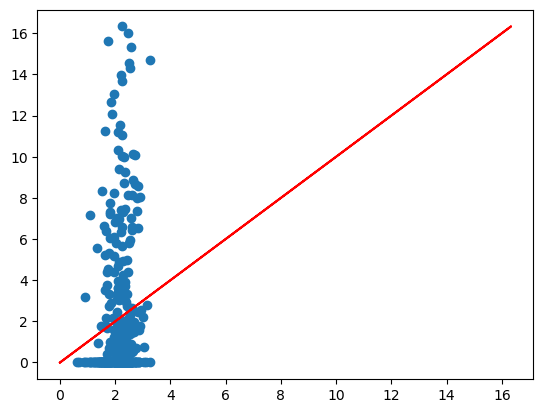

In [244]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [245]:
model.score(x, y)

0.01575554480495922

In [246]:
print(f'Intercept: {model.intercept_}')
print(f'R^2 score: {model.score(x_train, y_train)}')

Intercept: -11.472368898096299
R^2 score: 0.01607485385858265


[0.61960651 2.23825491 1.98696654 1.89389063 2.27809884]
0    0.0
1    0.0
2    0.0
5    0.0
6    0.0
Name: area, dtype: float64
Intercept: -11.472368898096299
R^2 score: 0.01607485385858265


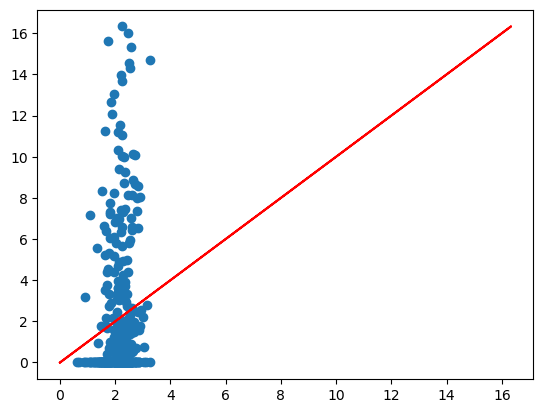

In [247]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
print(y_pred[:5])

print(y[:5])

plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

model.score(x, y)

print(f'Intercept: {model.intercept_}')
print(f'R^2 score: {model.score(x_train, y_train)}')